In [ ]:
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
import time
import random
import math
import pandas as pd
import matplotlib
import itertools

# Function Defining Section

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def InitiateShops(Num,Price_limit,Quality_Range,Capital,CostAtQuality):
    quality = [random.randint(*Quality_Range) for x in range(Num)]
    price = [random.randint(CostAtQuality[x],Price_limit) for x in quality]
    revenue = [0 for x in range(Num)]
    capital = [Capital for x in range(Num)]
    profit = [revenue[x]-capital[x] for x in range(Num)]
    products = [math.floor(capital[i]/CostAtQuality[x]) for i,x in enumerate(quality)]
    return [products,price,quality,revenue,capital,profit]
 
def InitiateUnifiedShops(Num,Price_Range,Quality_Range,Capital,CostAtQuality): #จะมีปรับปรุง
    price = [Price_Range[0] + math.ceil((x/Num)*(Price_Range[1]-Price_Range[0])) for x in range(Num)]
    quality = [Quality_Range[0] + math.ceil((x/Num)*(Quality_Range[1]-Quality_Range[0])) for x in range(Num)]
    revenue = [0 for x in range(Num)]
    capital = [Capital for x in range(Num)]
    products = [math.floor(capital[i]/CostAtQuality[x]) for i,x in enumerate(quality)]
    profit = [revenue[x]-capital[x] for x in range(Num)]
    return [products,price,quality,revenue,capital,profit]

def InitiateFocusedShop(Shop_List_input,price,quality,capital,CostAtQuality):
    Shop_List = [list(x) for x in Shop_List_input]
    Shop_List[0].append(math.floor(capital/CostAtQuality[quality]))
    Shop_List[1].append(price)
    Shop_List[2].append(quality)
    Shop_List[3].append(0)
    Shop_List[4].append(capital)
    Shop_List[5].append(0-capital)
    return Shop_List

def ExperimentShop(Shop_List_input,price,quality,capital,CostAtQuality):
    Shop_List = [list(x) for x in Shop_List_input]
    Shop_List[0].insert(0,math.floor(capital/CostAtQuality[quality]))
    Shop_List[1].insert(0,price)
    Shop_List[2].insert(0,quality)
    Shop_List[3].insert(0,0)
    Shop_List[4].insert(0,capital)
    Shop_List[5].insert(0,0-capital)
    return Shop_List

def AgentMaker(price,quality,capital,CostAtQuality):
    Output = []
    Output.append(math.floor(capital/CostAtQuality[quality]))
    Output.append(price)
    Output.append(quality)
    Output.append(0)
    Output.append(capital)
    Output.append(0-capital)
    return Output
    
def InitiateCustomer(Num,Wants_Range,Price_Range,Quality_Range,a_range = [0,1] ): #a*price + b*quality = Compatibility point
    product_wanted = [random.randint(*Wants_Range) for x in range(Num)]
    price_wanted = [random.randint(*Price_Range)*product_wanted[x] for x in range(Num)]
    quality_wanted = [random.randint(*Quality_Range) for x in range(Num)]
    ab = []
    for x in range(Num):    
        a = random.uniform(*a_range)
        b = 1-a
        AnB = [a,b]
        ab.append(AnB)
    return [product_wanted,price_wanted,quality_wanted,ab]

def FindShop(Index,Shop_List,Customer_List):
    product_wanted = Customer_List[0][Index]
    price_wanted = Customer_List[1][Index]
    quality_wanted = Customer_List[2][Index]
    a = Customer_List[3][Index][0]
    b = Customer_List[3][Index][1]
    all_price = [price for price in Shop_List[1]]
    Mean_Price = np.sum(all_price)/len(all_price)
    all_Ql = [ql for ql in Shop_List[2]]
    Mean_Ql = np.sum(all_Ql)/len(all_Ql)
    Selected = []
    for index,price in enumerate(Shop_List[1]):
        if price_wanted >= price*product_wanted:
            if Shop_List[0][index] >= product_wanted:
                Selected.append(index)
            else:
                continue
        else:
            continue
    if len(Selected) == 0:
        return None
    Compat_price = [(math.log(sigmoid((Shop_List[1][z]-Mean_Price)/Mean_Price),a)\
                     +math.log((-1)*sigmoid((Shop_List[2][z]-Mean_Ql)/Mean_Ql)+1,b)) for z in Selected]
    fake_index = Compat_price.index(max(Compat_price))
    Shop_to_buy_index = Selected[fake_index]
    
    return Shop_to_buy_index 

def Buying(Customer_Index,Shop_Index,Shop_List,Customer_List):
    product_wanted = Customer_List[0][Customer_Index]
    price_wanted = Customer_List[1][Customer_Index]
    quality_wanted = Customer_List[2][Customer_Index]
    Shop_List[0][Shop_Index] = Shop_List[0][Shop_Index] - product_wanted
    Shop_List[3][Shop_Index] = Shop_List[3][Shop_Index] + product_wanted * Shop_List[1][Shop_Index]
    Shop_List[5][Shop_Index] = Shop_List[5][Shop_Index] + product_wanted * Shop_List[1][Shop_Index]
    
def Simulate(Shop_List,Customer_List):
    for Customer_Index in range(len(Customer_List[0])):
        Shop_to_buy_index = FindShop(Customer_Index,Shop_List,Customer_List)
        if Shop_to_buy_index is None :
            continue
        Buying(Customer_Index,Shop_to_buy_index,Shop_List,Customer_List)

def Select(Pt_List,n):
    numbers = np.array(Pt_List)
    idx = np.argpartition(numbers, -n)[-n:]
    indices = idx[np.argsort((-numbers)[idx])]
    return indices

Cells Method

In [ ]:
class Optimization:
  def __init__(self,distribution_num,parameter_num,param_limit,param_lr):
    self.n = distribution_num
    self.np = parameter_num
    self.lim = param_limit #2d list [[,],[,]]
    self.param_lr = param_lr

  def Initiate(self):
    param_init = []
    for i,limit in enumerate(self.lim):
      a = []
      b = (limit[1]-limit[0])/((self.n[i]-2)+1)
      for i in range(self.n[i]):
          a.append(limit[0]+(i*b))
      param_init.append(a)
    p = itertools.product(*param_init)
    output = [list(i) for i in p]
    return output

  def Breed(self,init_coor,lr_indices):
    lr = self.param_lr
    list_a = []
    for coor in init_coor:
      list_b = []  
      for i,point in enumerate(coor):
        list_c = []
        if point+lr[i][lr_indices] <= self.lim[i][1]:
          list_c.append(point+lr[i][lr_indices])
        list_c.append(point+0)
        if point-lr[i][lr_indices] >= self.lim[i][0]:
          list_c.append(point-lr[i][lr_indices])
        list_b.append(list_c)
      list_a.append(list_b)
    output = []
    for cell in list_a:
      p = itertools.product(*cell)
      result = [list(i) for i in p]
      output.append(result)
    
    return output


# Environment Defining Section


In [ ]:
Customer_Env = []
Shop_Env = []

random.seed(1000)

env_prob = [0.4,0.3,0.3]

Capital_THEM = [1500,1500,1500]    
CostAtQuality = [[math.ceil((x+1)*5+x**1.65) for x in range(10+1)] for i in range(len(Capital_THEM))]
price_limit = [125 for i in range(len(Capital_THEM))]       
Ql_range = [[0,6],[7,10],[0,10]]     
Shop_Number = [10,10,15] 

for i in range(len(Capital_THEM)):
    Shop_Env.append(InitiateShops(Shop_Number[i],price_limit[i],Ql_range[i],Capital_THEM[i],CostAtQuality[i]))
 

Customer_Num = [25,25,25]        
Want_Range = [[1,3] for i in range(len(Customer_Num))]      
Budget_Range = [[125,126],[125,126],[125,126]] 
Quality_Range = [[1,10],[1,10],[1,10]]   
a_rand_range = [[0,1],[0,1],[0.9,1]]    
for i in range(len(Customer_Num)):
    Customer_Env.append(InitiateCustomer(Customer_Num[i],Want_Range[i],Budget_Range[i],Quality_Range[i],a_range = a_rand_range[i]))

Capital = 500

# Environment Exploring

In [ ]:
brute_PQL_history = []
brute_Profit_history = []
time_history = []
for indices in range(len(Shop_Env)):
    brute_Profit_result=[]
    brute_price_limit = Budget_Range[indices][1]
    price_step = 0.1
    brute_quality_limit = 10
    quality_step = 1    
    brute_price_list  = []
    brute_quality_list = []
    price = 0
    quality = 0
    while True:
        brute_price_list.append(round(price,1))
        price += price_step 
        if price>brute_price_limit:
            break
    while True:
        brute_quality_list.append(quality)
        quality += quality_step 
        if quality>brute_quality_limit:
            break
    p = itertools.product(brute_price_list,brute_quality_list)
    brute_PQL_list = [list(i) for i in p]
    brute_PQL_history.append(brute_PQL_list)
    print(f"Environment {indices+1} is being explored with {len(brute_PQL_list)} combinations")
    start = time.time()
    for index,parameter in enumerate(brute_PQL_list):
        
        price = parameter[0]
        quality = round(parameter[1])
        Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[indices],price,quality,Capital,CostAtQuality[indices]))

        Simulate(Shop_List_Inloop,Customer_Env[indices])

        brute_Profit_result.append(Shop_List_Inloop[5][-1])
        
        if index % 2000 == 0:
            print(f"Index {index} Finished")
    brute_Profit_history.append(brute_Profit_result)
    end = time.time()
    time_history.append(end-start)
    print(f"Environment {indices+1} Finished with {end-start} seconds taken")
    max_value = max(brute_Profit_result)
    max_index = brute_Profit_result.index(max_value)
    print(f"Max profit of Environment {indices+1} is {max_value} with price = {brute_PQL_list[max_index][0]} and quality = {brute_PQL_list[max_index][1]}\n")


Environment 1 is being explored with 13871 combinations
Index 0 Finished
Index 2000 Finished
Index 4000 Finished
Index 6000 Finished
Index 8000 Finished
Index 10000 Finished
Index 12000 Finished
Environment 1 Finished with 16.224525928497314 seconds taken
Max profit of Environment 1 is 382.0 with price = 126.0 and quality = 7

Environment 2 is being explored with 13871 combinations
Index 0 Finished
Index 2000 Finished
Index 4000 Finished
Index 6000 Finished
Index 8000 Finished
Index 10000 Finished
Index 12000 Finished
Environment 2 Finished with 15.935034275054932 seconds taken
Max profit of Environment 2 is 1207.5 with price = 68.3 and quality = 2

Environment 3 is being explored with 13871 combinations
Index 0 Finished
Index 2000 Finished
Index 4000 Finished
Index 6000 Finished
Index 8000 Finished
Index 10000 Finished
Index 12000 Finished
Environment 3 Finished with 19.98243761062622 seconds taken
Max profit of Environment 3 is 1093.2999999999995 with price = 33.9 and quality = 0



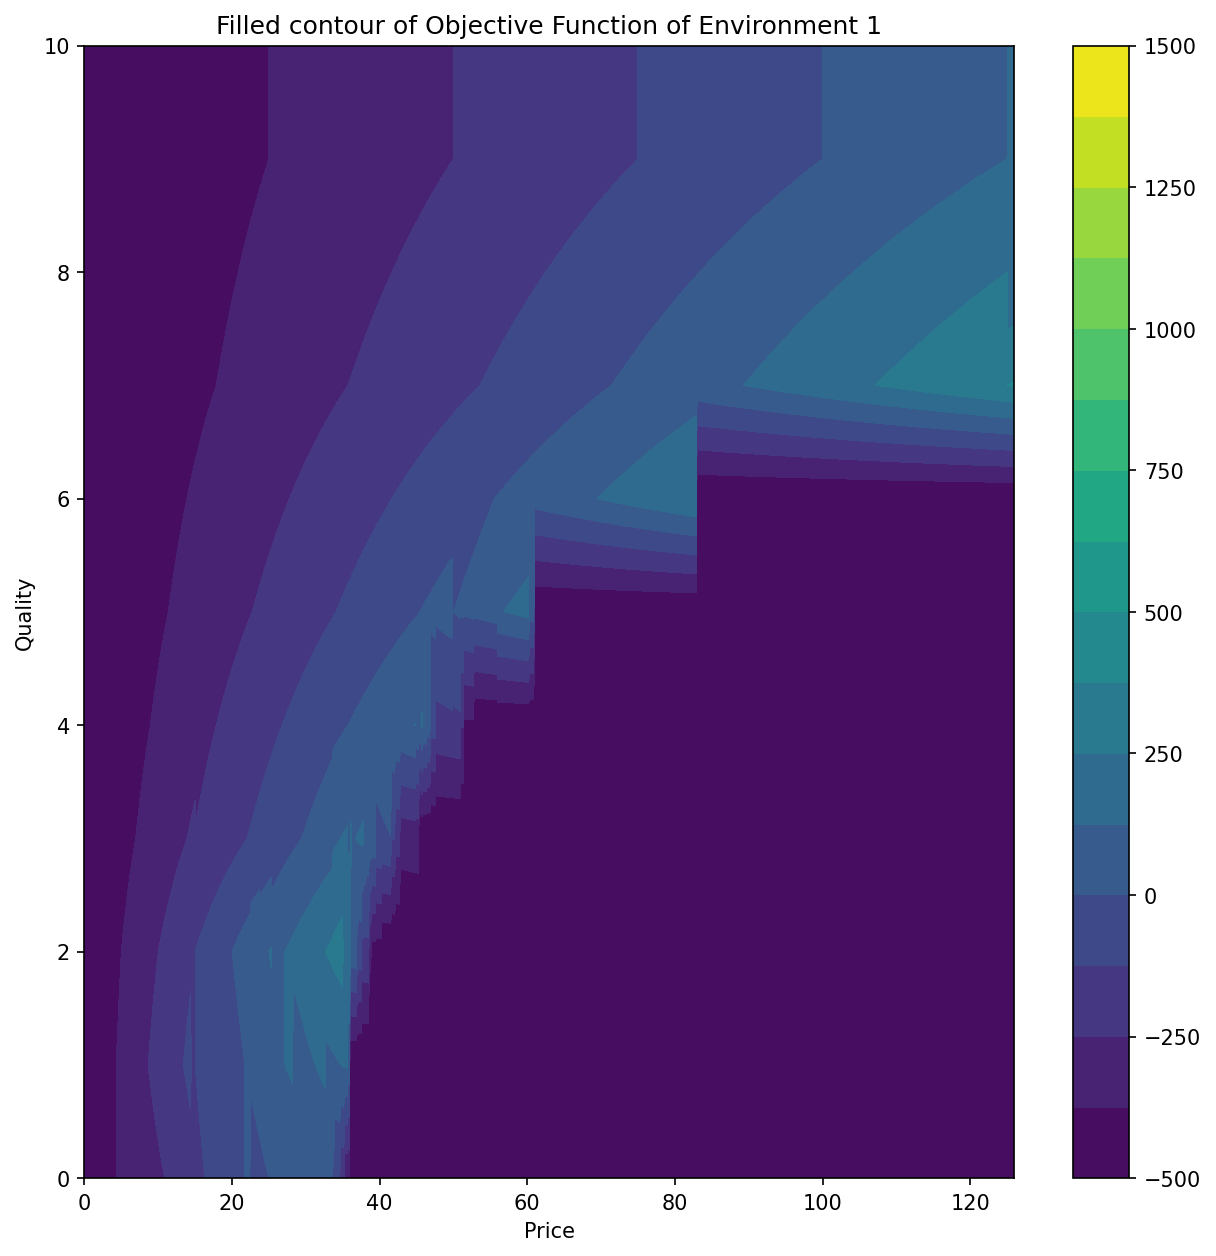

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


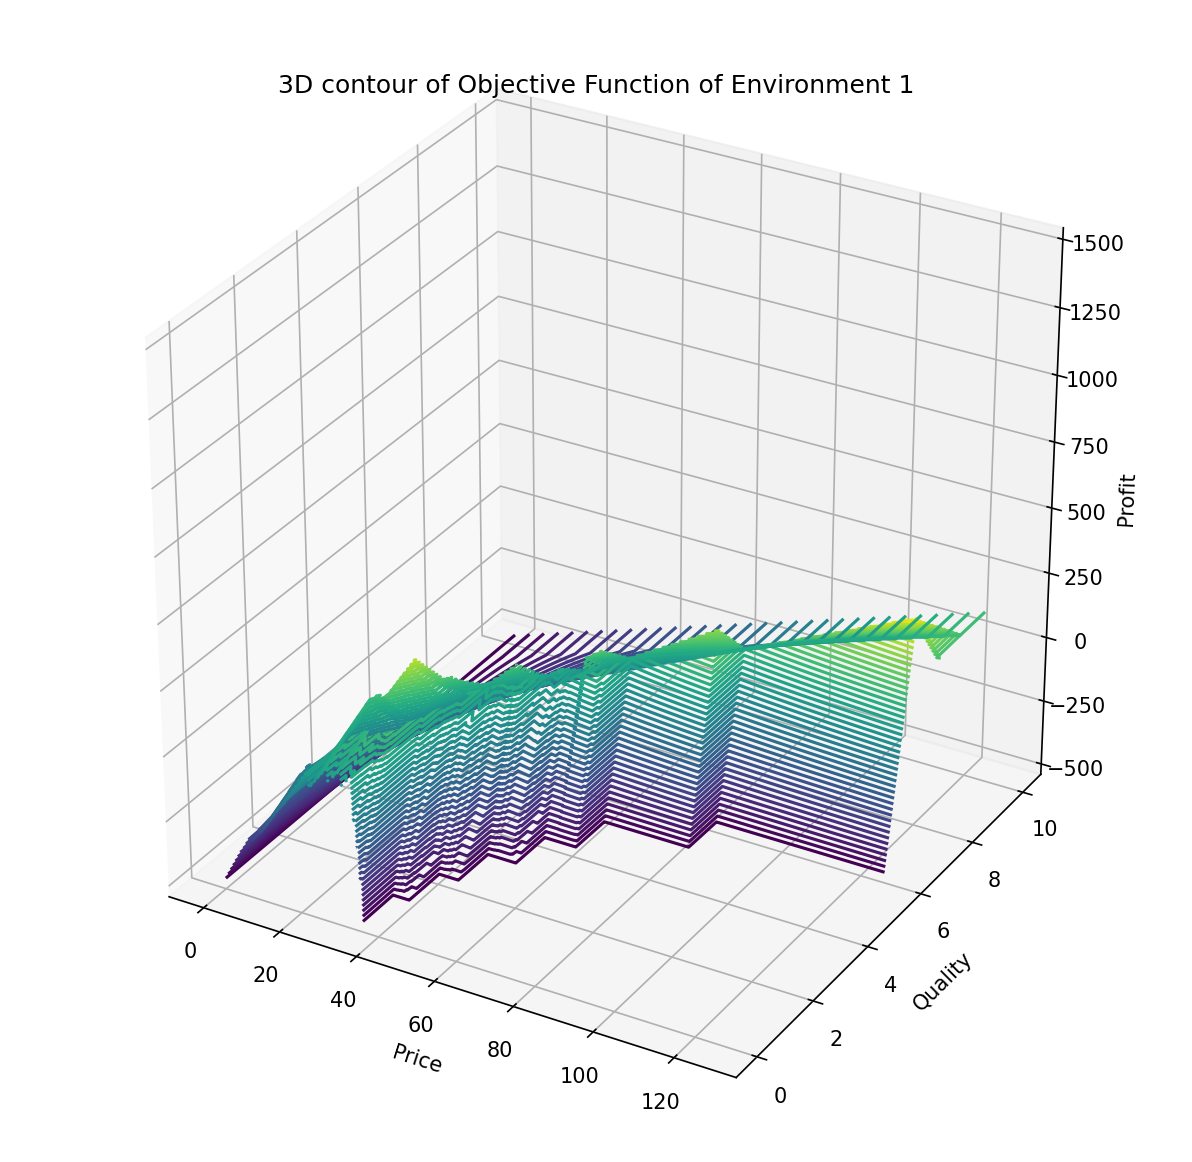

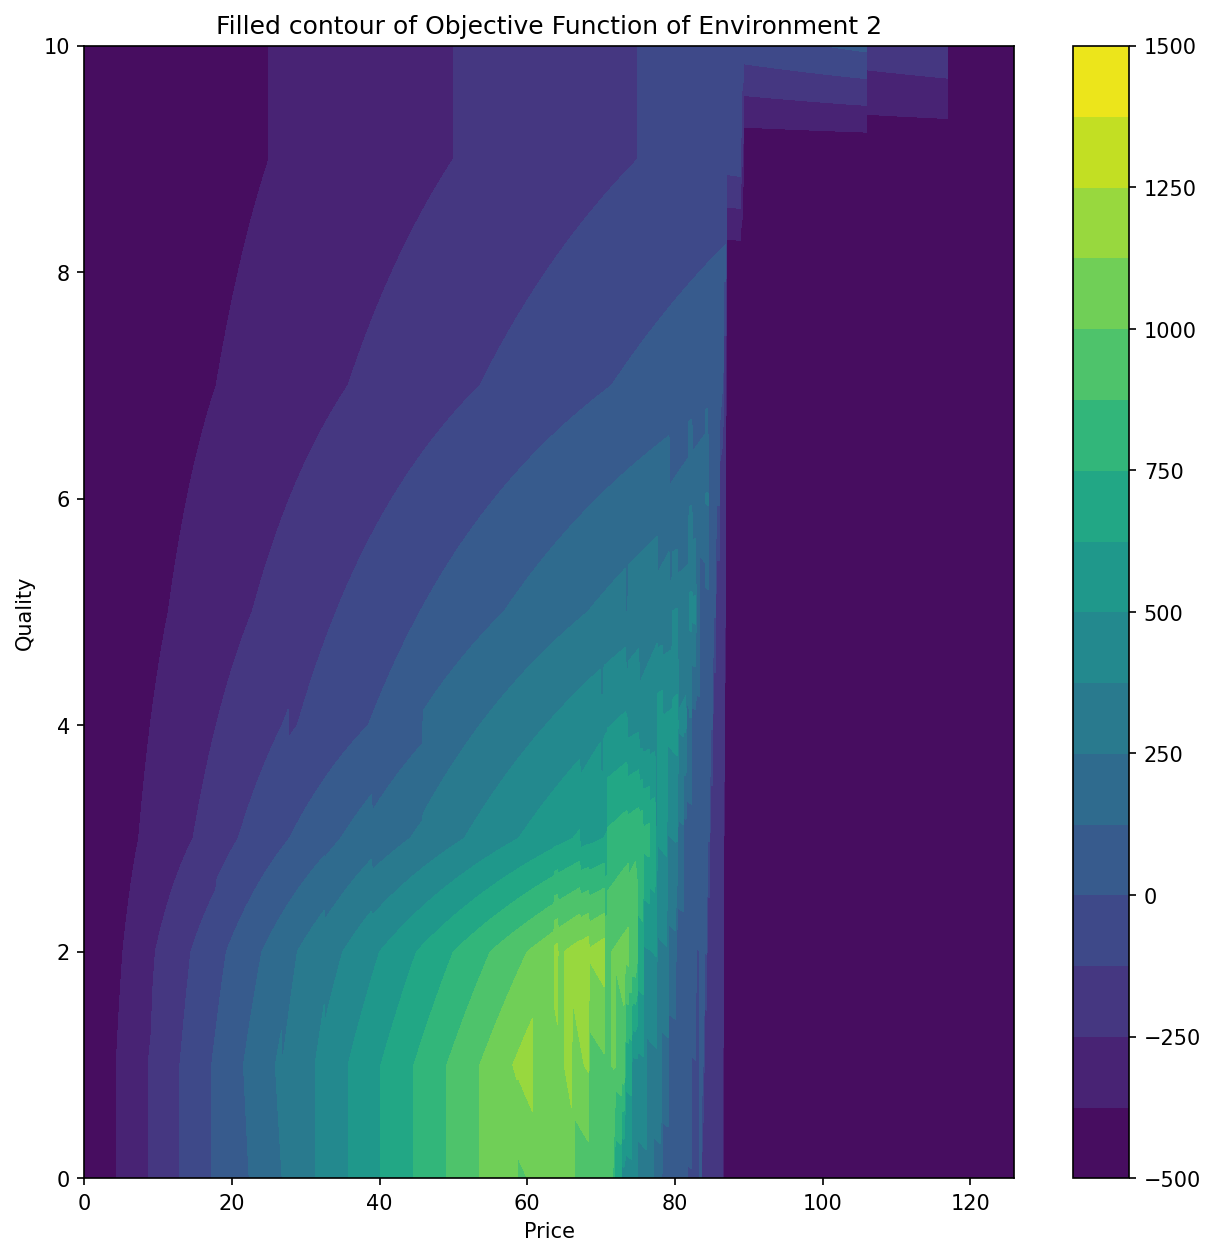

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


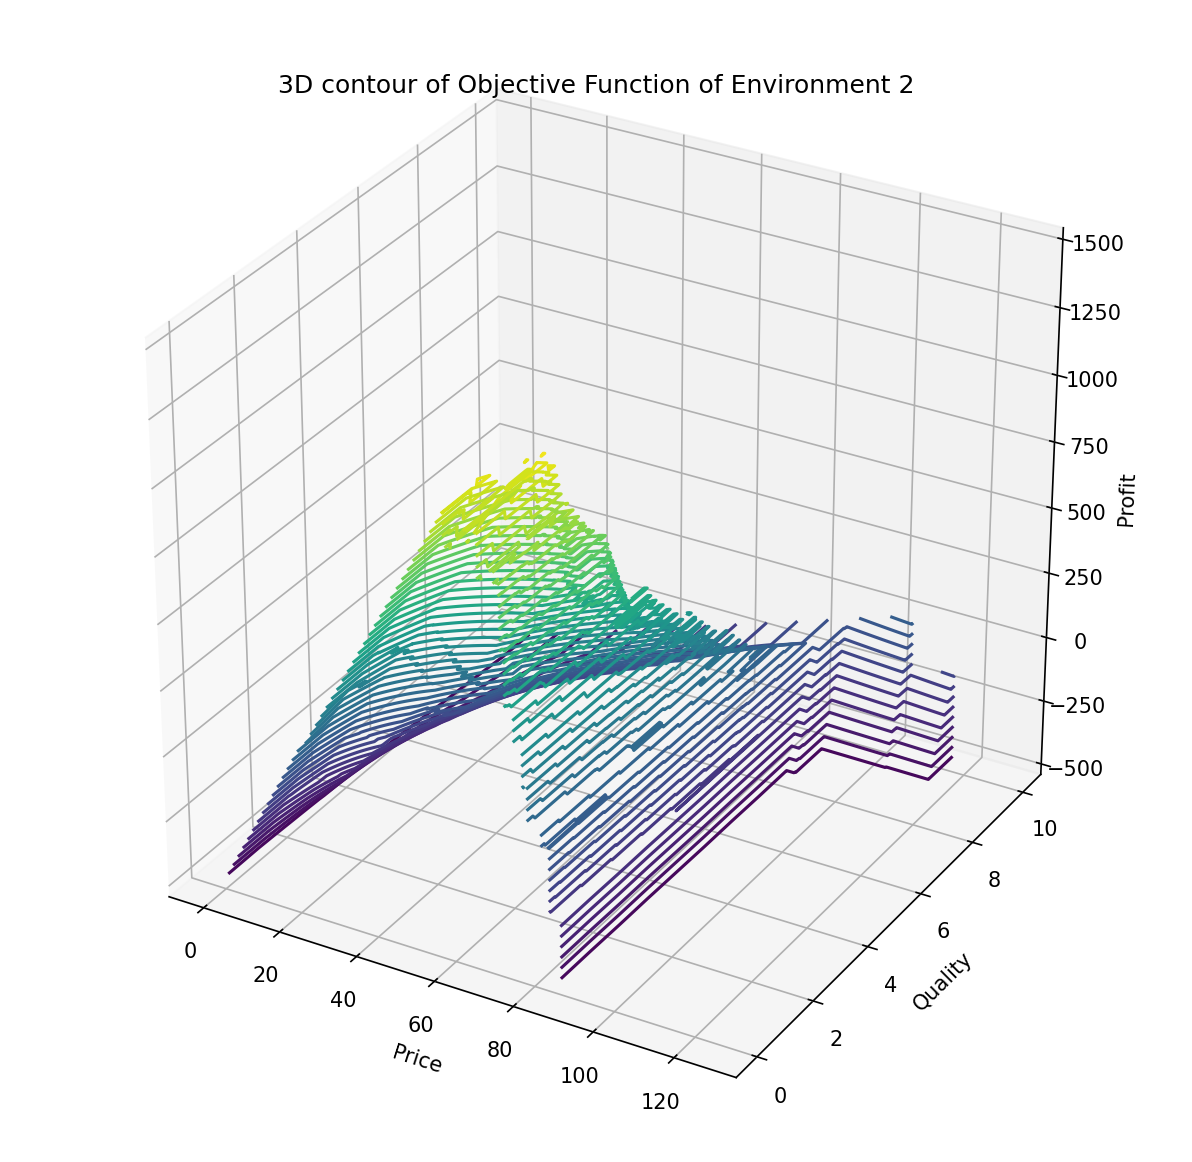

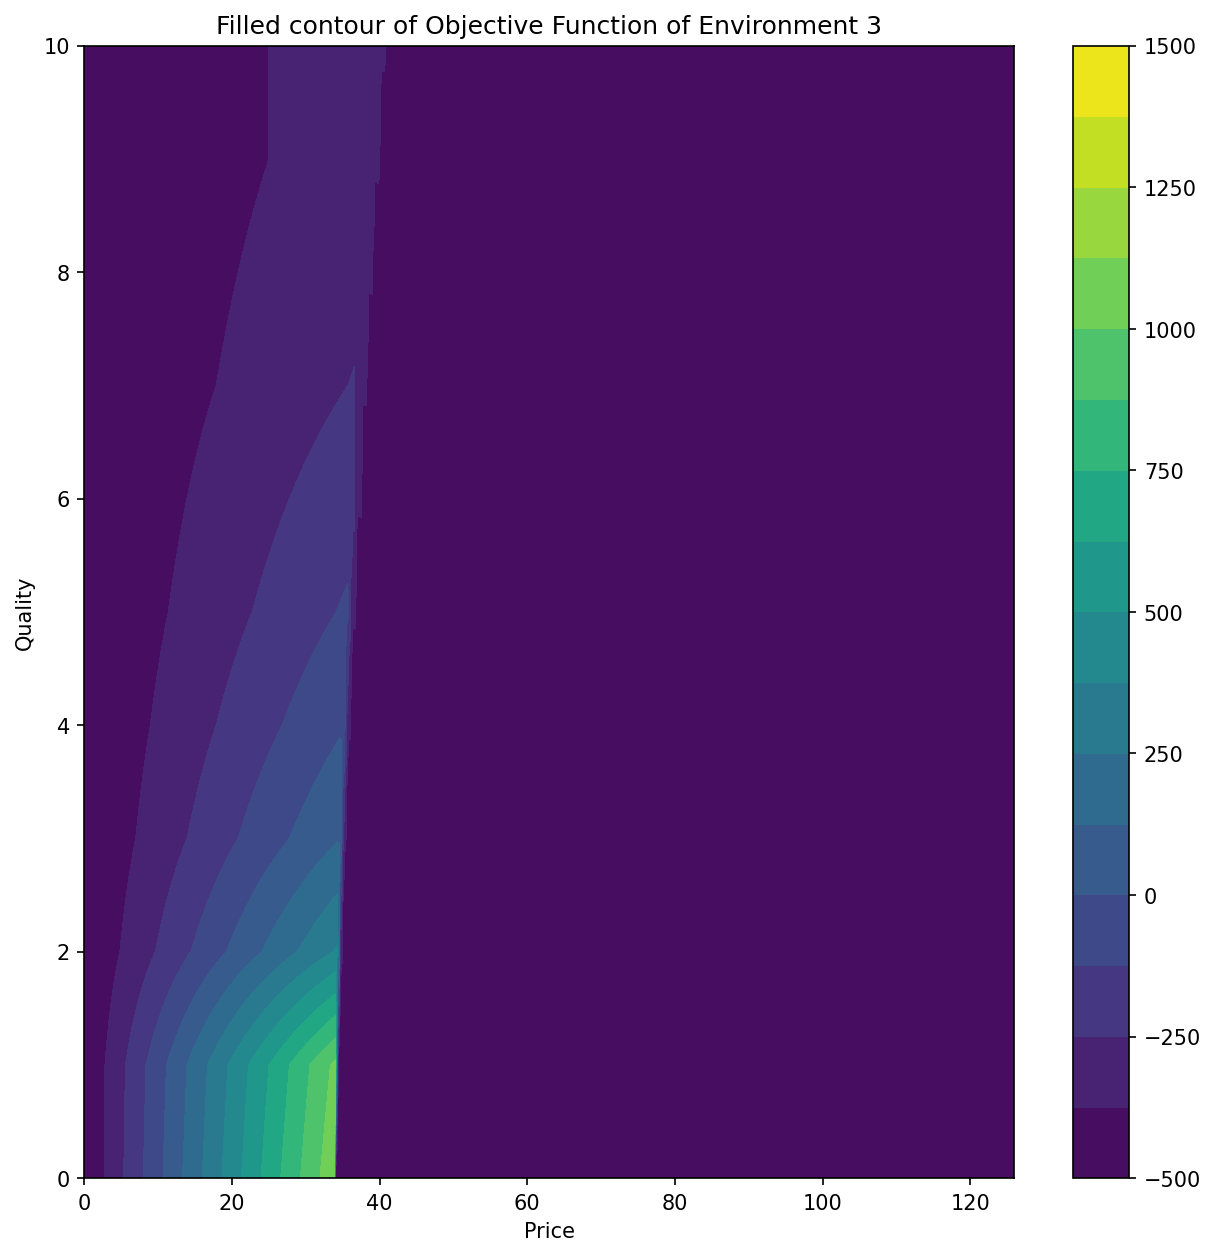

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


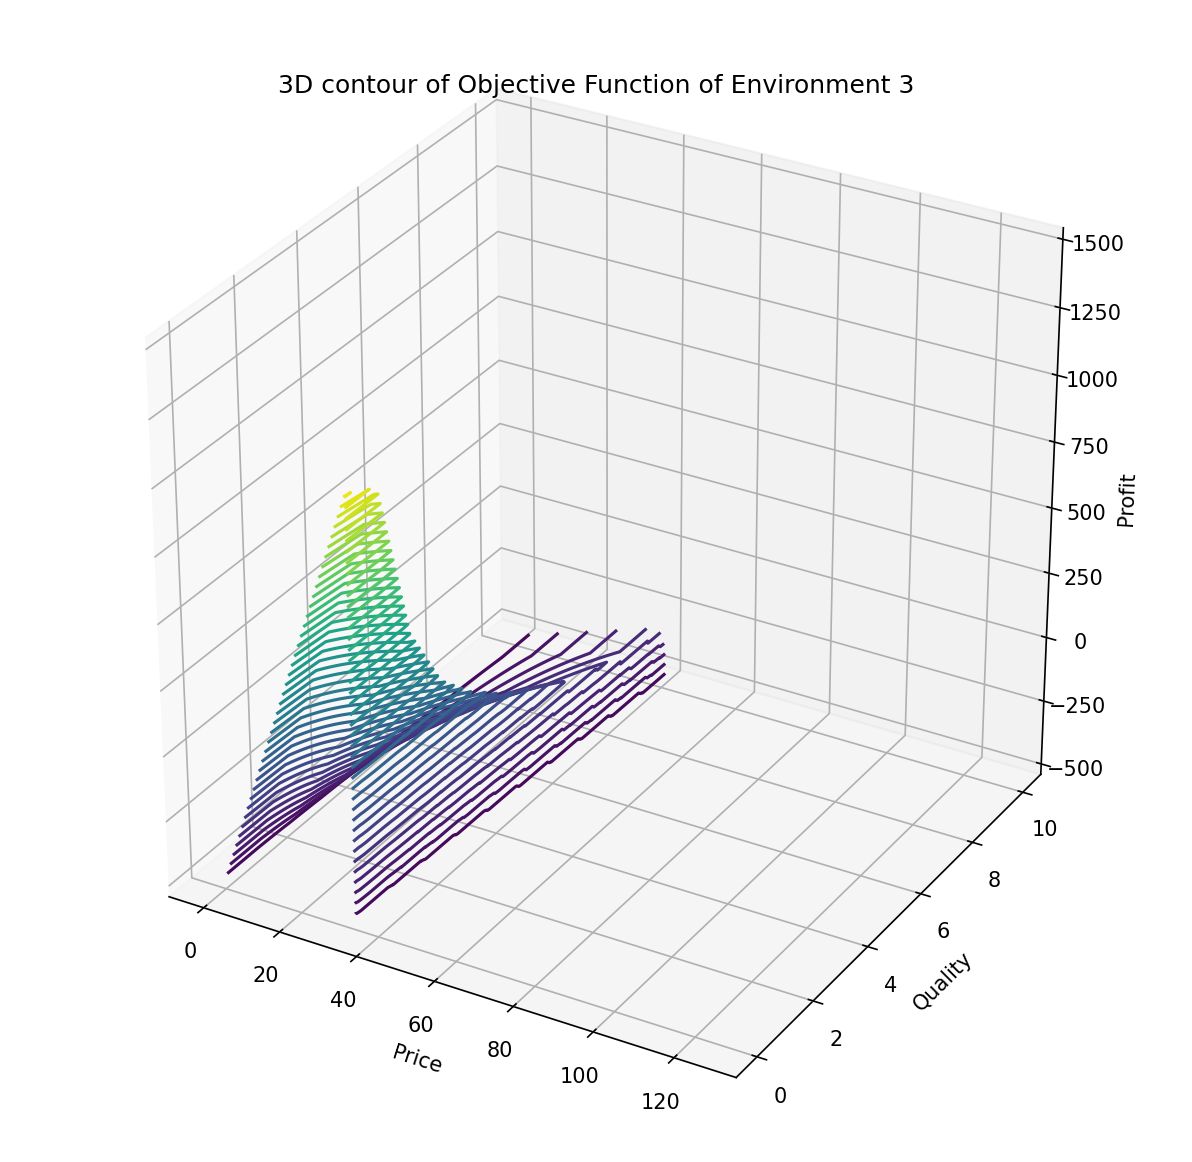

In [ ]:
for i in range(len(brute_PQL_history)):

    xyz_point = []
    for x in brute_PQL_history[i]:
        xyz_point.append(x.copy())

    for index1,a in enumerate(brute_Profit_history[i]):
        xyz_point[index1].append(a)
    xyz_table = pd.DataFrame(np.array(xyz_point),columns = ['x','y','z'])
    Z = xyz_table.pivot_table(index='x', columns='y', values='z').T.values
    X_unique = np.sort(xyz_table.x.unique())
    Y_unique = np.sort(xyz_table.y.unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    fig,ax=plt.subplots(1,1,figsize=(10,10),dpi = 150)
    cp = ax.contourf(X, Y, Z, levels = [-500,-375,-250,-125,0,125,250,375,500,625,750,875,1000,1125,1250,1375,1500])
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(f'Filled contour of Objective Function of Environment {i+1}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Quality')
    plt.savefig(f"Filled contour env{i+1}.png", dpi=150)
    plt.show()
    fig = plt.figure(figsize=(10,10),dpi = 150)
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50)
    ax.set_zlim(-500,1500)
    ax.set_xlabel('Price')
    ax.set_ylabel('Quality')
    ax.set_zlabel('Profit')
    ax.set_title(f'3D contour of Objective Function of Environment {i+1}')
    plt.savefig(f"3D contour env{i+1}.png", dpi=150)
    plt.show()

# One Point at Each Environment

Global Maxima Of Environment 1


In [ ]:
profit = []
price = 126
quality = 7
for env_index in range(len(Shop_Env)):
        Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
        Simulate(Shop_List_Inloop,Customer_Env[env_index])
        profit.append(Shop_List_Inloop[5][-1]) 
profit

[382, -500, -500]

Global Maxima Of Environment 2


In [ ]:
profit = []
price = 68.3
quality = 2
for env_index in range(len(Shop_Env)):
        Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
        Simulate(Shop_List_Inloop,Customer_Env[env_index])
        profit.append(Shop_List_Inloop[5][-1]) 
profit

[-500, 1207.5, -500]

Global Maxima Of Environment 3


In [ ]:
profit = []
price = 33.9
quality = 0
for env_index in range(len(Shop_Env)):
        Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
        Simulate(Shop_List_Inloop,Customer_Env[env_index])
        profit.append(round(Shop_List_Inloop[5][-1],1)) 
profit

[-127.1, 449.2, 1093.3]

# Expected Value Brute Force

In [ ]:
brute_price_limit = Budget_Range[0][1]
price_step = 0.1
brute_quality_limit = 10
quality_step = 1
brute_price_list  = []
brute_quality_list = []
price = 0
quality = 0
while True:
    brute_price_list.append(round(price,1))
    price += price_step 
    if price>brute_price_limit:
        break
while True:
    brute_quality_list.append(quality)
    quality += quality_step 
    if quality>brute_quality_limit:
        break
p = itertools.product(brute_price_list,brute_quality_list)
brute_PQL_list = [list(i) for i in p]
len(brute_PQL_list)
brute_EV_result = []
start = time.time()
print(f"Environment is being explored with {len(brute_PQL_list)} combinations")
for index,parameter in enumerate(brute_PQL_list):
    
    price = parameter[0]
    quality = round(parameter[1])
    expected_value = 0
    for env_index in range(len(Shop_Env)):
        Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
        Simulate(Shop_List_Inloop,Customer_Env[env_index])
        expected_value += Shop_List_Inloop[5][-1] * env_prob[env_index]

    brute_EV_result.append(expected_value)

    if index % 1000 == 0:
        print(f"Index {index} Finished")

end = time.time()
print(f"Finished with {end-start} seconds taken")

Environment is being explored with 13871 combinations
Index 0 Finished
Index 1000 Finished
Index 2000 Finished
Index 3000 Finished
Index 4000 Finished
Index 5000 Finished
Index 6000 Finished
Index 7000 Finished
Index 8000 Finished
Index 9000 Finished
Index 10000 Finished
Index 11000 Finished
Index 12000 Finished
Index 13000 Finished
Finished with 52.29286503791809 seconds taken


In [ ]:
max_value = max(brute_EV_result)
max_index = brute_EV_result.index(max_value)
max_EV_price = brute_PQL_list[max_index][0]
max_EV_quality = brute_PQL_list[max_index][1]
print(f"Max Expected Value is {max_value} with price = {brute_PQL_list[max_index][0]} and quality = {brute_PQL_list[max_index][1]}")
env_profit = []
for env_index in range(len(Shop_Env)):
    price = max_EV_price
    quality = max_EV_quality
    Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
    Simulate(Shop_List_Inloop,Customer_Env[env_index])
    print(f"Env{env_index+1} will get profit at {Shop_List_Inloop[5][-1]}")
    env_profit.append(Shop_List_Inloop[5][-1])


Max Expected Value is 489.4 with price = 34.0 and quality = 1
Env1 will get profit at 112.0
Env2 will get profit at 452.0
Env3 will get profit at 1030.0


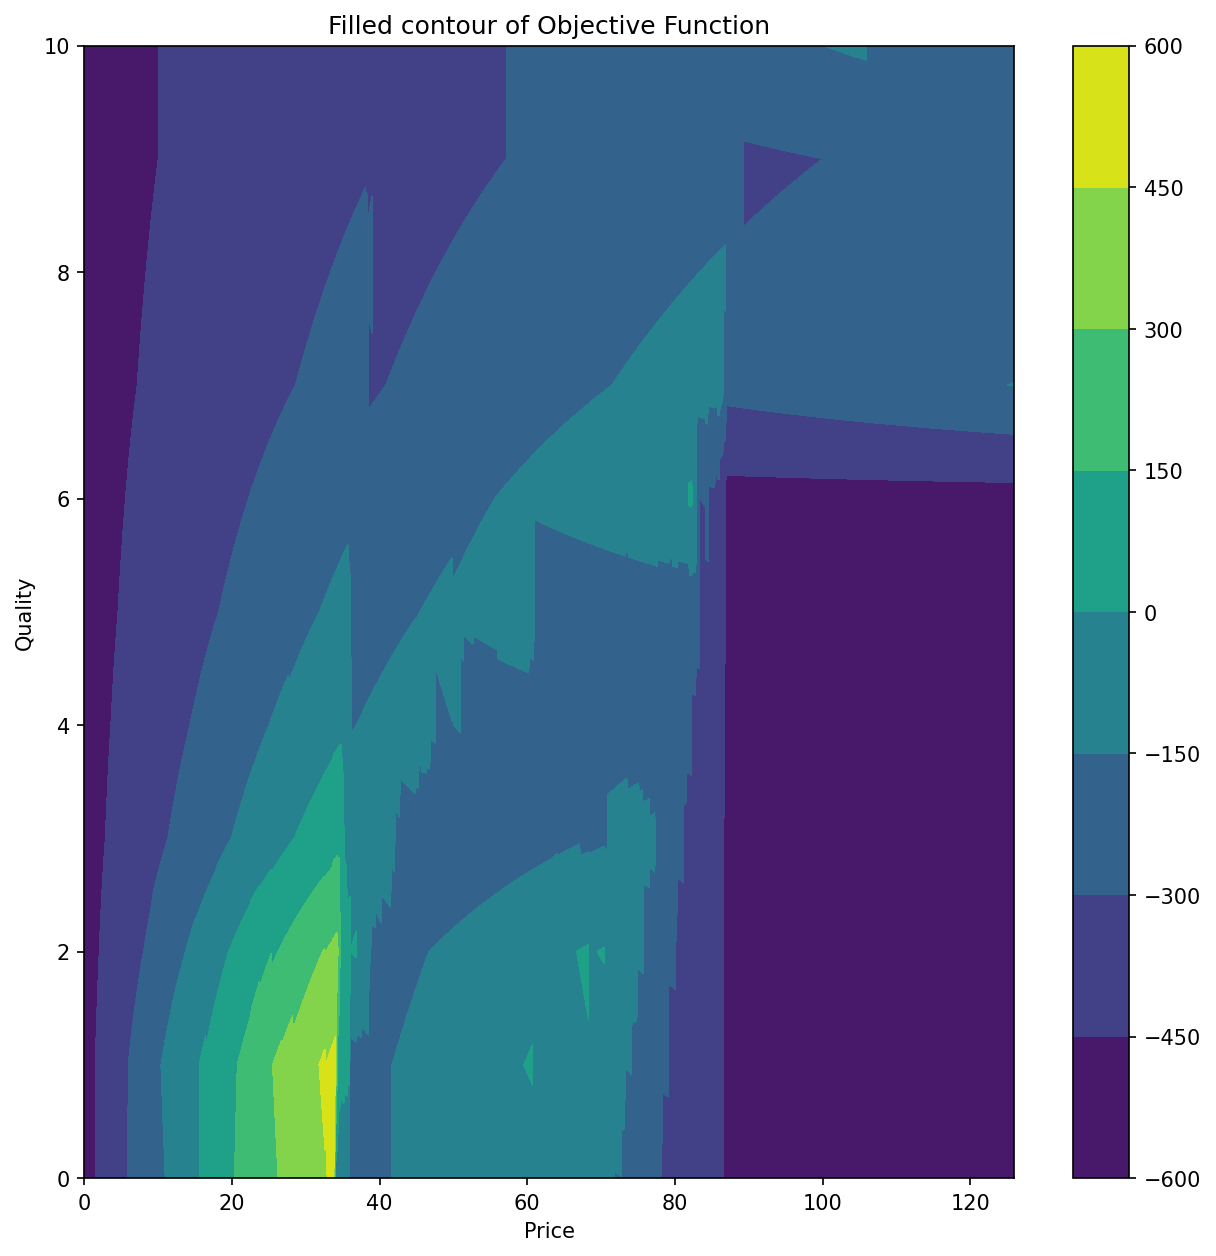

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


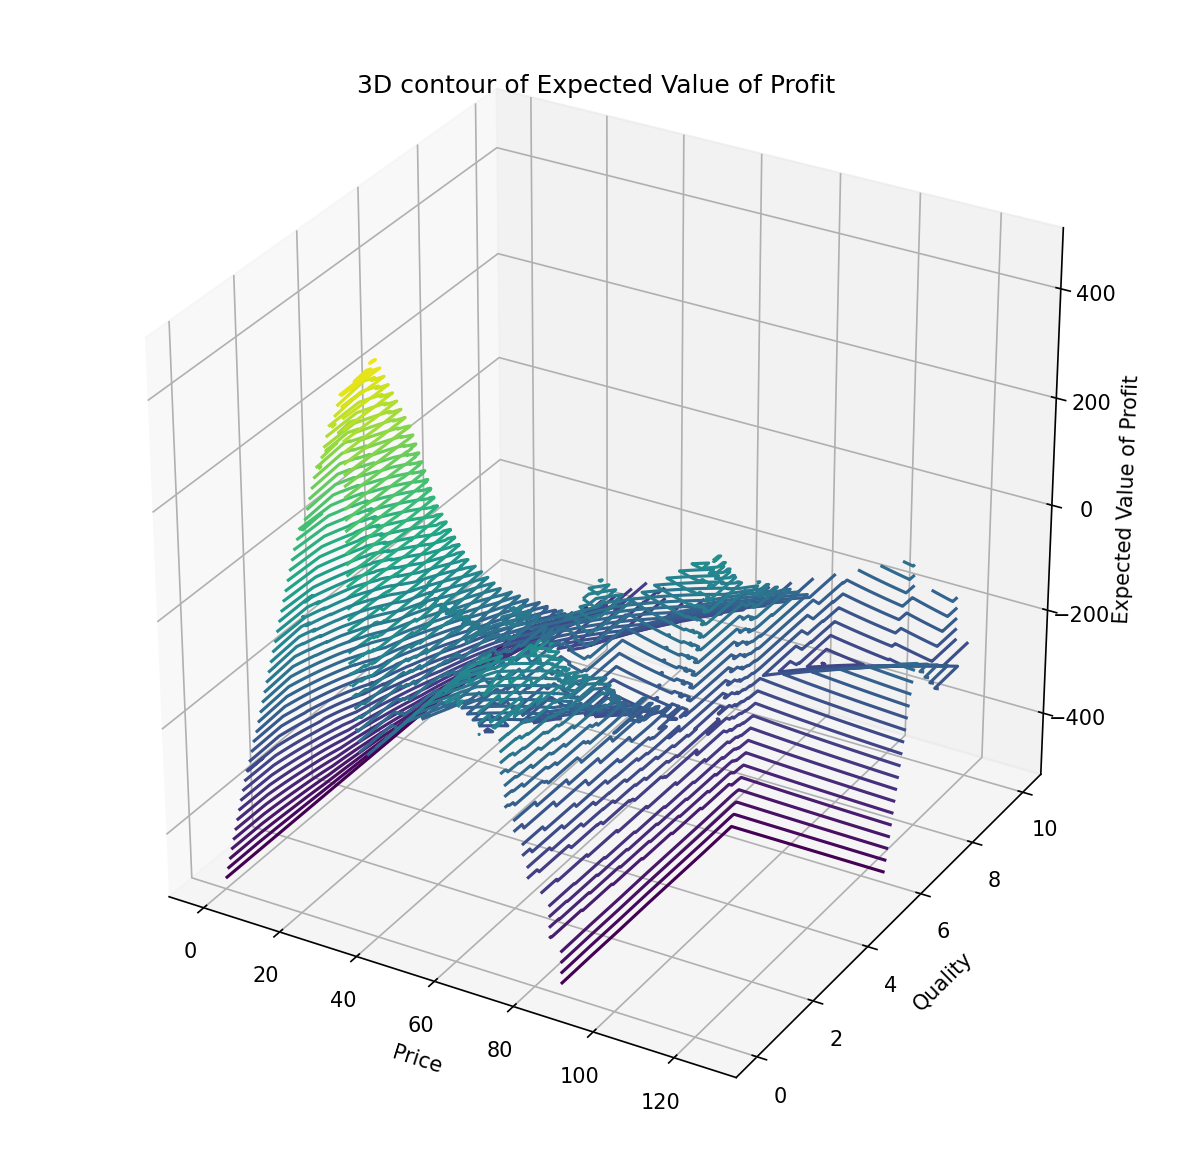

In [ ]:
xyz_point = [x.copy() for x in brute_PQL_list]

for i,a in enumerate(brute_EV_result):
    xyz_point[i].append(a)
xyz_table = pd.DataFrame(np.array(xyz_point),columns = ['x','y','z'])
Z = xyz_table.pivot_table(index='x', columns='y', values='z').T.values
X_unique = np.sort(xyz_table.x.unique())
Y_unique = np.sort(xyz_table.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
fig,ax=plt.subplots(1,1,figsize=(10,10),dpi = 150)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled contour of Objective Function')
ax.set_xlabel('Price')
ax.set_ylabel('Quality')
plt.savefig("Filled contour of Expected Value of Profit.png", dpi=150)
plt.show()
fig = plt.figure(figsize=(10,10),dpi = 150)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('Price')
ax.set_ylabel('Quality')
ax.set_zlabel('Expected Value of Profit')
ax.set_title('3D contour of Expected Value of Profit')
plt.savefig("3D contour.png", dpi=150)
plt.show()

# Expected Value Optimization

In [ ]:
#การกำหนด Hyperr Parameter สำหรับการ Optimize

Generation = 30         #จะมีการปรับกี่ Generation
Pricelr = [10,5,1,0.1]             #lr จะปรับเมื่อเจอคำตอบซ้ำ ๆ 
Qualitylr = [1,1,1,1] 
param_lr = [Pricelr,Qualitylr]               #จำนวนของร้านที่ดีที่สุดที่จะเลือก
opt = Optimization([6,3],2,[[0,Budget_Range[0][1]],[0,10]],param_lr)
#__init__(self,distribution_num,parameter_num,param_limit,param_lr)

In [ ]:
init = opt.Initiate()
MaxParam_History = []
MaxPt_History = []
MaxQ_History = []
MaxPri_History = []
duplication_count = 0
start = time.time()
end0 = []
lr_index = 0
stabilized_generation = Generation-1
for gen in range(Generation):
    Best_Param_History = []
    param = opt.Breed(init,lr_index) 
    init_len = len(init)
    init = []
    Best_of_cell_History = []
    BestPt_of_cell_History = []
    for i in range(init_len):
        cell = param[i]
        Pt_List = []
        ParamHistory = []
        output = []
        for index,parameter in enumerate(cell):
            price = parameter[0]
            quality = round(parameter[1])
            expected_value = 0
            for env_index in range(len(Shop_Env)):
                Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
                Simulate(Shop_List_Inloop,Customer_Env[env_index])
                expected_value += Shop_List_Inloop[5][-1] * env_prob[env_index]

            Pt_List.append(expected_value)
            ParamHistory.append([x[-1] for x in Shop_List_Inloop])
                
        Survived_index = Select(Pt_List,1)[0]
        Best_of_cell = ParamHistory[Survived_index]
        Best_Price = Best_of_cell[1]
        Best_Quality = Best_of_cell[2]
        Best_Pt = Pt_List[Survived_index]
        BestPt_of_cell_History.append(Best_Pt)
        Best_of_cell_History.append(Best_of_cell)
        init.append([Best_Price,Best_Quality])

    Pt_of_each_cell = []
    for pt in BestPt_of_cell_History:
        Pt_of_each_cell.append(pt)

    Best_index = Select(Pt_of_each_cell,1)[0]
    Best_of_gen_param = Best_of_cell_History[Best_index]
    MaxParam_History.append(Best_of_gen_param)
    MaxPri_History.append(Best_of_gen_param[1])
    MaxQ_History.append(Best_of_gen_param[2])
    MaxPt_History.append(Pt_of_each_cell[Best_index])

    if (gen+1)%5 == 0:
        print("Gen",gen+1,"has finished")
    if gen >= 2:
        if MaxPt_History[-1] == MaxPt_History[-2]:
            duplication_count += 1
        else :
            duplication_count = 0

        if duplication_count % 5 == 0 and duplication_count != 0:
            stabilized_generation = gen - duplication_count
            if lr_index < len(Pricelr)-1: 
                lr_index += 1
            else:
                lr_index = 0
    end0.append(time.time())

end = time.time()
print(f"Runtime of the program is {end - start}")
print(f"Runtime Before Stable is {end0[stabilized_generation]-start}")
print(f"Converged Generation is {stabilized_generation}")

Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Gen 25 has finished
Gen 30 has finished
Runtime of the program is 17.749844074249268
Runtime Before Stable is 10.505168199539185
Converged Generation is 17


In [ ]:
max_EV_price = MaxPri_History[-1]
max_EV_quality = MaxQ_History[-1]
max_EV = MaxPt_History[-1]
print(f"Max Expected Value is {max_EV} with price = {max_EV_price} and quality = {max_EV_quality}")

env_profit = []
for env_index in range(len(Shop_Env)):
    price = max_EV_price
    quality = max_EV_quality
    Shop_List_Inloop = list(InitiateFocusedShop(Shop_Env[env_index],price,quality,Capital,CostAtQuality[env_index]))
    Simulate(Shop_List_Inloop,Customer_Env[env_index])
    print(f"Env{env_index+1} will get profit at {round(Shop_List_Inloop[5][-1],2)}")
    env_profit.append(Shop_List_Inloop[5][-1])


Max Expected Value is 489.4 with price = 34.0 and quality = 1
Env1 will get profit at 112.0
Env2 will get profit at 452.0
Env3 will get profit at 1030.0
